## Установка VK API

In [1]:
import vk_api

Получаем токен на vkhost;

- выбираем vk.com

- принимаем условия

- копируем код из строки браузера (да-да, там, где написано "не копируйте")

Токен живет 1 час, он расположен между `https://oauth.vk.com/blank.html#access_token=` и `user_id=61895623`

```
https://oauth.vk.com/blank.html#access_token=ЗДЕСЬ ВАШ ТОКЕН&user_id=61895623
```

Токен привязан к вашему IP, поэтому запускаем его локально!

***Комментарий:*** Я обнаружила ошибку в задании. Токен будет между `https://oauth.vk.com/blank.html#access_token=` и `&expires_in=`

In [3]:
vkApiSession= vk_api.VkApi(token=my_token) #свой токен я сохранила в переменную my_token, но ячейку удалила

vk = vkApiSession.get_api()

`-20629724` - ID паблика "Хабр" ВК

ID пользователей имеют вид `00000000`

ID сообществ имеют вид `-00000000`

Выгрузим 100 верхних постов и выведем результат

***Комментарий***: Я вывела 1 результат, так как, выводя 100, документ не считывался в гитхаб из-за слишком большого количества аутпута.

In [4]:
posts = vk.wall.get(owner_id=-20629724, count=1)['items']
posts

[{'inner_type': 'wall_wallpost',
  'ads_easy_promote': {'type': 2,
   'text': 'Что-то пошло не так.',
   'label_text': '',
   'button_text': '',
   'is_ad_not_easy': False},
  'is_pinned': 1,
  'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True},
  'marked_as_ads': 0,
  'hash': 'gUWof9VY22xjsmpIr5Ao6C33bakX',
  'type': 'post',
  'push_subscription': {'is_subscribed': False},
  'attachments': [{'type': 'photo',
    'photo': {'album_id': -7,
     'date': 1734013862,
     'id': 457329654,
     'owner_id': -20629724,
     'access_key': 'ac66430da8474fc81d',
     'post_id': 1600618,
     'sizes': [{'height': 68,
       'type': 'm',
       'width': 130,
       'url': 'https://sun9-7.userapi.com/s/v1/ig2/cFb1GdMDaR19GH0HgS7tVX-22fjAkU4ZXd1yy5fj1A6SZiD9VhUm5Coa_4C9-U_9y-Te6gP601W3fEv7O6ju3lAG.jpg?quality=96&as=32x17,48x25,72x38,108x57,160x84,240x126,360x189,480x252,540x283,640x336,720x378,1080x567,1200x630&from=bu&u=tGllxbgVlnSW1ZLZVdEe5Gk7MsLWqdR79krCE6HPJz0&cs=130x68'},
      {'

In [5]:
import csv
import pandas as pd

**Задание**

1. Изучите [**документацию VK API**](https://dev.vk.com/ru/method/wall)

2. Выберите **сообщество** для скрейпинга данных

3. Произведите **парсинг** выгруженных данных:

- извлеките изображение под постом

- извлеките текст публикации

- извлеките любую статистику, например, количество просмотров

4. Сформируйте файл ***.csv**

Используйте шаблон:

## Функция для скрейпинга данных со страниц ВК 
### на базе данных сообщества [Натальная карта](https://vk.com/natalnaya_karta_show)

In [8]:
def scrape_wall_data(token, owner_id, count=10):
    """
    Функция для извлечения данных со стены ВКонтакте.

    Аргументы:
    token - строка, токен доступа к API ВКонтакте
    owner_id - int, ID сообщества или пользователя
    count - int, количество постов для извлечения (по умолчанию 10)

    Возвращает:
    Список словарей, содержащих данные постов.
    """
    try:
        # Инициализация VK API
        vk_session = vk_api.VkApi(token=token)
        vk = vk_session.get_api()

        # Метод wall.get - возвращает объект, содержащий число результатов в поле count и массив объектов записей на стене в поле items.
        posts = vk.wall.get(owner_id=owner_id, count=count)['items']

        # Хранилище для данных
        scraped_data = []

        # Парсинг
        for post in posts:
            post_data = {
                'text': post.get('text', ''),
                'likes': post['likes']['count'],
                'reposts': post['reposts']['count'],
                'comments': post['comments']['count'],
                'attachments': post.get('attachments', [])
            }
            scraped_data.append(post_data)

        return scraped_data

    except vk_api.exceptions.ApiError as e:
        print(f"Error accessing VK API: {e}")
        return []
data1 = scrape_wall_data(token=my_token, owner_id=-211232966, count=10)
data1

[{'text': 'НОВЫЙ ВЫПУСК "НАТАЛЬНОЙ КАРТЫ"!🔥 ЭКСКЛЮЗИВНО В VK ВИДЕО!🔥 \n \nУ нас в гостях модельер, стилист, телеведущий и блогер — [club39131783|Гоша Карцев]. Весы, а значит [club221829791|Олесе] будет тяжело пошатнуть рациональность нашего гостя. Зато [club221233703|Диме] будет попроще и повеселее. Кто в итоге победит? Смотрим!👇',
  'likes': 8436,
  'reposts': 5530,
  'comments': 586,
  'attachments': [{'type': 'video',
    'video': {'response_type': 'full',
     'access_key': '9a7601f447b9b3064e',
     'can_comment': 1,
     'can_like': 1,
     'can_repost': 1,
     'can_subscribe': 1,
     'can_add_to_faves': 1,
     'can_add': 1,
     'comments': 4012,
     'date': 1734080400,
     'description': 'Магнит Косметик - Выбирай быстро! Покупай легко!\nОгромный ассортимент парфюмерии и новогодних подарков по очень приятным ценам по ссылке: https://vk.cc/cFUfB1\nРеклама. magnit.ru erid: 2VtzquYHJsT\n\nДо 27 декабря проходит Финальная распродажа года на Ozon. Чудо-скидки до 80% и блестящий

## Сохранение в файл CSV

In [ ]:
# Допишите функцию для сохранения *.csv
def save_to_csv(data, file_name='vk_wall_posts.csv'):

   # Cоздаем файл в режиме записи
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:

        # Создание объекта DictWriter, который будет использоваться для записи словарей в файл. Этот объект автоматически сопоставляет ключи словаря с заголовками столбцов.
        writer = csv.DictWriter(file, fieldnames=['text', 'likes', 'reposts', 'comments', 'attachments']) #переменная fieldnames содержит список строк, которые представляют заголовки столбцов для CSV файла.

        # Метод writer.writeheader() записывает заголовки (первую строку) в файл, используя ключи из fieldnames.
        writer.writeheader()

        # Для каждого словаря вызывается метод writer.writerow(row), который записывает текущий словарь в файл как новую строку. Ключи словаря должны совпадать с заголовками, чтобы данные корректно располагались в соответствующих столбцах.
        for row in data:
            writer.writerow(row)

data2 = save_to_csv(data1, file_name='vk_wall_posts.csv')

## В документе данные выглядят так
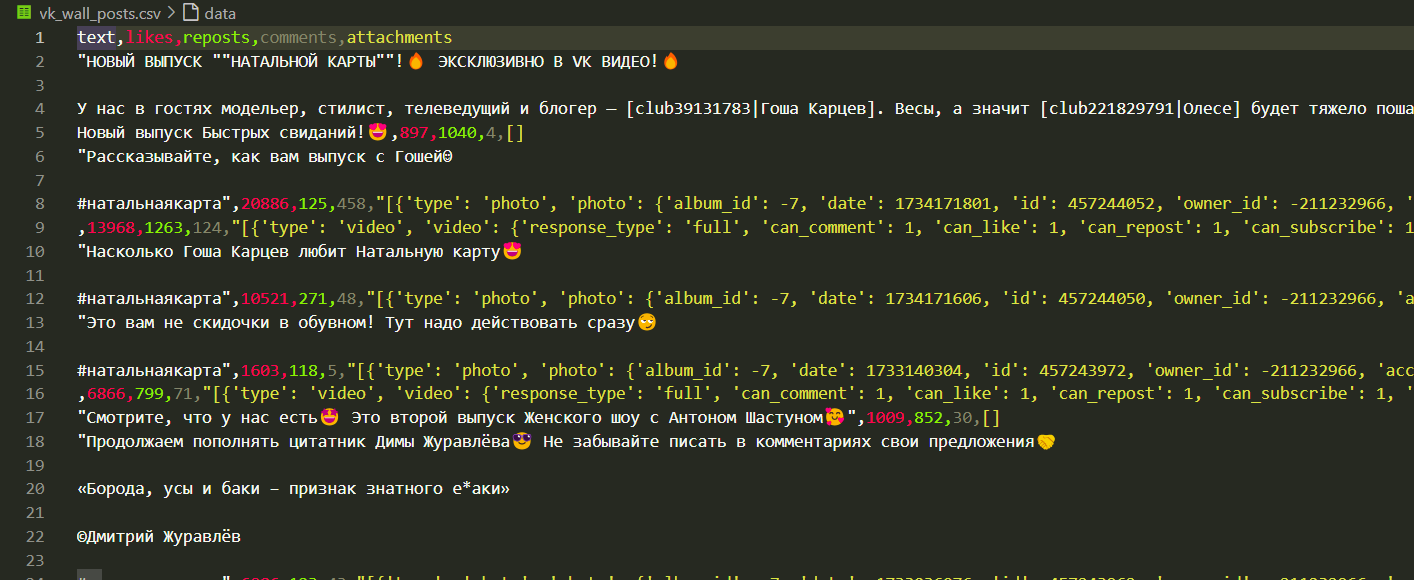

## Анализ и визуализация данных (лайки, репосты, комментарии)

                                                text  likes  reposts  \
0  НОВЫЙ ВЫПУСК "НАТАЛЬНОЙ КАРТЫ"!🔥 ЭКСКЛЮЗИВНО В...   8436     5530   
1                    Новый выпуск Быстрых свиданий!😍    897     1040   
2  Рассказывайте, как вам выпуск с Гошей☺\n\n#нат...  20886      125   
3                                                     13968     1263   
4  Насколько Гоша Карцев любит Натальную карту😍\n...  10521      271   

   comments                                        attachments  
0       586  [{'type': 'video', 'video': {'response_type': ...  
1         4                                                 []  
2       458  [{'type': 'photo', 'photo': {'album_id': -7, '...  
3       124  [{'type': 'video', 'video': {'response_type': ...  
4        48  [{'type': 'photo', 'photo': {'album_id': -7, '...  
Среднее количество лайков: 7737.1
Среднее количество репостов: 1055.5
Среднее количество комментариев: 140.2


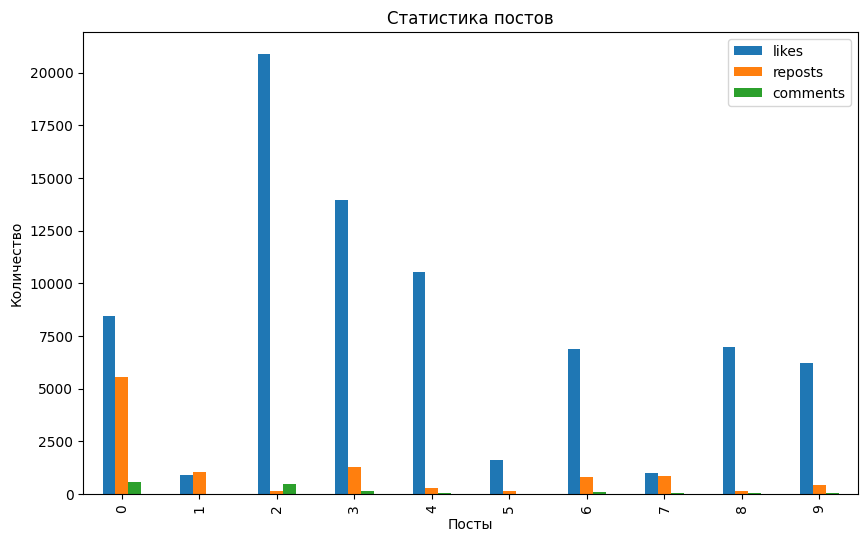

In [11]:
import matplotlib.pyplot as plt

def stats(data):
  '''
  Функция для анализа и визуализации данных.

  Аргументы:
  data - список словарей, содержащих данные постов
  '''
  df = pd.DataFrame(data)

  # Вывод первых нескольких строк данных
  print(df.head())

  # Простой анализ: среднее количество лайков, репостов и комментариев
  print("Среднее количество лайков:", df['likes'].mean()) # Функция mean() помогает вычислить среднее значение набора значений, переданных в функцию.
  print("Среднее количество репостов:", df['reposts'].mean())
  print("Среднее количество комментариев:", df['comments'].mean())

  # Визуализация
  df[['likes', 'reposts', 'comments']].plot(kind='bar', figsize=(10, 6))
  plt.title('Статистика постов')
  plt.xlabel('Посты')
  plt.ylabel('Количество')
  plt.show()
  pass
data3 = stats(data1)
data3

## Анализ сообщества [Kuplinov ► Play](https://vk.com/kuplinovplay)

Данные успешно сохранены в vk_wall_posts.csv
                                                text  likes  reposts  \
0  НАКОРМИЛ ПОДОЗРИТЕЛЬНОГО ТИПА ► DREDGE #11\nht...    505       34   
1  Из видео "СПАС СОБАКУ ► DREDGE #9" \n\n#мемы #...   4717      267   
2  Короткая история про Дмитрия и рыболовную сеть...   2942      653   
3              Всем доброго морозного.\nУтренний чат    561        4   
4  Доброго вечернего времени! Надеюсь день прошел...    514        1   

   comments                                        attachments  
0        12  [{'type': 'photo', 'photo': {'album_id': -7, '...  
1        33  [{'type': 'photo', 'photo': {'album_id': -7, '...  
2        69  [{'type': 'video', 'video': {'response_type': ...  
3        28  [{'type': 'photo', 'photo': {'album_id': -7, '...  
4        10  [{'type': 'photo', 'photo': {'album_id': -7, '...  
Среднее количество лайков: 1793.6
Среднее количество репостов: 98.05
Среднее количество комментариев: 37.3


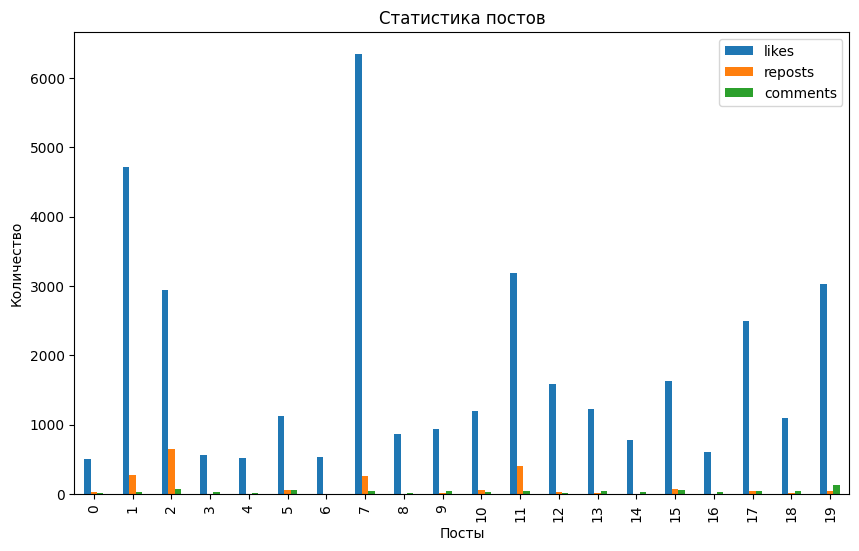

In [13]:
# Функция для выполнения задачи
def main():
    # Введите ваш токен VK API
    token = my_token

    # Введите ID сообщества
    owner_id = -56169357

    # Введите количество публикаций для скрейпинга
    num_posts = 20

    # Запустите функцию для скрейпинга
    wall_data = scrape_wall_data(token, owner_id, count=num_posts)

    if wall_data:
        # Запустите функцию для сохранения в CSV
        save_to_csv(wall_data)
        print("Данные успешно сохранены в vk_wall_posts.csv")

        # Выведите статистику по выгруженной информации
        stats(wall_data)
    else:
        print("No data")

if __name__ == "__main__":
    main()

## Анализ сообщества [deutschyopta](https://vk.com/deutschyopta)

Данные успешно сохранены в vk_wall_posts.csv
                                                text  likes  reposts  \
0  Hallöchen 💜 Новый год уже дышит в спину, но ещ...     20        4   
1  ЗАЧЕМ СМОТРЕТЬ НА ПУПОК?\n\n🔍  Die Nabelschau ...     38       17   
2  JUBELN!\n\nСегодня у нас в #memeadvent_yopta т...     24        4   
3                                                       595       97   
4                       einreden — внушать, убеждать    329       43   

   comments                                        attachments  
0         1  [{'type': 'photo', 'photo': {'album_id': -7, '...  
1         1  [{'type': 'photo', 'photo': {'album_id': -7, '...  
2         1  [{'type': 'video', 'video': {'response_type': ...  
3         3  [{'type': 'photo', 'photo': {'album_id': -7, '...  
4         3  [{'type': 'photo', 'photo': {'album_id': -7, '...  
Среднее количество лайков: 175.05
Среднее количество репостов: 30.55
Среднее количество комментариев: 2.3


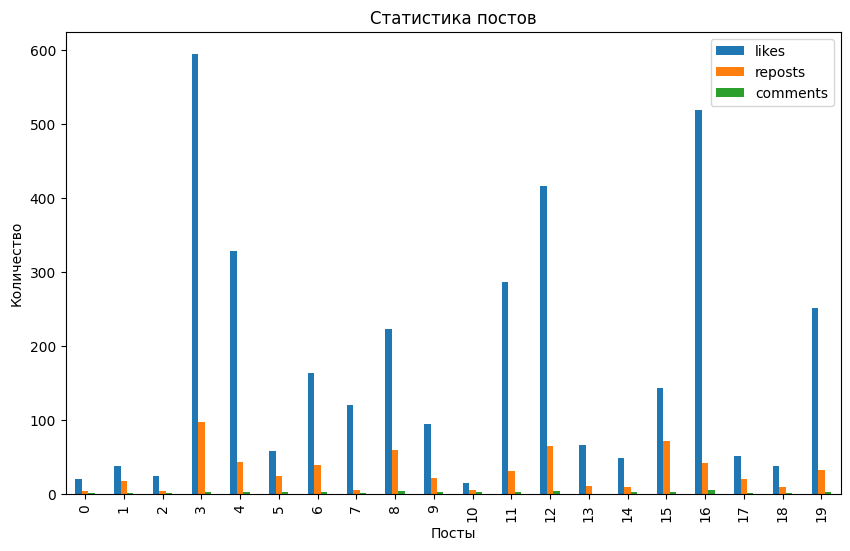

In [15]:
def main():

    token = my_token

    owner_id = -159881489

    num_posts = 20

    wall_data = scrape_wall_data(token, owner_id, count=num_posts)

    if wall_data:
        save_to_csv(wall_data)
        print("Данные успешно сохранены в vk_wall_posts.csv")

        stats(wall_data)
    else:
        print("No data")

if __name__ == "__main__":
    main()